In [9]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scorecard import Scorecard
import time
from ucimlrepo import fetch_ucirepo 

from sklearn.metrics import accuracy_score

## aesthetic evaluation dataset

#### load dataset

In [ ]:
aesthetic_evaluation_data = pd.read_csv('datasets/aesthetic_evaluation_data.csv')
aesthetic_evaluation_objective = aesthetic_evaluation_data['Objective Evaluation']

# get data from author = eduard.bonci
aesthetic_evaluation_data_eduard = aesthetic_evaluation_data[aesthetic_evaluation_data['Author'] == 'eduard.bonci']
aesthetic_evaluation_data_eduard_objective = aesthetic_evaluation_data_eduard['Objective Evaluation']
aesthetic_evaluation_data_eduard = aesthetic_evaluation_data_eduard.drop(columns=['Image Filename','Author','Objective Evaluation', 'sX2L Value','sX2a Value','sX2b Value','sX2Lab Value','sEMDL Value','sEMDa Value','sEMDb Value','sEMDLab Value'])
aesthetic_evaluation_data_eduard_X = aesthetic_evaluation_data_eduard.drop(columns='Subjective Evaluation')
aesthetic_evaluation_data_eduard_y = aesthetic_evaluation_data_eduard['Subjective Evaluation']

# get data from author = cmavioso
aesthetic_evaluation_data_cmavioso = aesthetic_evaluation_data[aesthetic_evaluation_data['Author'] == 'cmavioso']
aesthetic_evaluation_data_cmavioso_objective = aesthetic_evaluation_data_cmavioso['Objective Evaluation']
aesthetic_evaluation_data_cmavioso = aesthetic_evaluation_data_cmavioso.drop(columns=['Image Filename','Author','Objective Evaluation', 'sX2L Value','sX2a Value','sX2b Value','sX2Lab Value','sEMDL Value','sEMDa Value','sEMDb Value','sEMDLab Value'])
aesthetic_evaluation_data_cmavioso_X = aesthetic_evaluation_data_cmavioso.drop(columns='Subjective Evaluation')
aesthetic_evaluation_data_cmavioso_y = aesthetic_evaluation_data_cmavioso['Subjective Evaluation']

# get data from author = mariajoaocardoso
aesthetic_evaluation_data_mariajoaocardoso = aesthetic_evaluation_data[aesthetic_evaluation_data['Author'] == 'mariajoaocardoso']
aesthetic_evaluation_data_mariajoaocardoso_objective = aesthetic_evaluation_data_mariajoaocardoso['Objective Evaluation']
aesthetic_evaluation_data_mariajoaocardoso = aesthetic_evaluation_data_mariajoaocardoso.drop(columns=['Image Filename','Author','Objective Evaluation', 'sX2L Value','sX2a Value','sX2b Value','sX2Lab Value','sEMDL Value','sEMDa Value','sEMDb Value','sEMDLab Value'])
aesthetic_evaluation_data_mariajoaocardoso_X = aesthetic_evaluation_data_mariajoaocardoso.drop(columns='Subjective Evaluation')
aesthetic_evaluation_data_mariajoaocardoso_y = aesthetic_evaluation_data_mariajoaocardoso['Subjective Evaluation']

# get all data
aesthetic_evaluation_data = aesthetic_evaluation_data.drop(columns=['Image Filename','Author','Objective Evaluation', 'sX2L Value','sX2a Value','sX2b Value','sX2Lab Value','sEMDL Value','sEMDa Value','sEMDb Value','sEMDLab Value'])
aesthetic_evaluation_X = aesthetic_evaluation_data.drop(columns='Subjective Evaluation')
aesthetic_evaluation_y = aesthetic_evaluation_data['Subjective Evaluation']

aesthetic_evaluation_data.head()

In [ ]:
# number of observations
print(f"Number of observations: {len(aesthetic_evaluation_data)}")

# number of features
print(f"Number of features: {len(aesthetic_evaluation_data.columns)}")

# num of of obs for eduard.bonci
print(f"Number of observations for eduard.bonci: {len(aesthetic_evaluation_data_eduard)}")

# num of of obs for cmavioso
print(f"Number of observations for cmavioso: {len(aesthetic_evaluation_data_cmavioso)}")

# num of of obs for mariajoaocardoso
print(f"Number of observations for mariajoaocardoso: {len(aesthetic_evaluation_data_mariajoaocardoso)}")

In [ ]:
# distribution of the target variable
print(aesthetic_evaluation_y.value_counts())

# for eduard.bonci
print("\neduard.bonci target variable distribution:  ", aesthetic_evaluation_data_eduard_y.value_counts())

# for cmavioso
print("\ncmavioso target variable distribution:  ", aesthetic_evaluation_data_cmavioso_y.value_counts())

# for mariajoaocardoso
print("\nmariajoaocardoso target variable distribution:  ", aesthetic_evaluation_data_mariajoaocardoso_y.value_counts())

In [ ]:
# show proportion of each class
aesthetic_evaluation_y.value_counts(normalize=True)

In [ ]:
aesthetic_evaluation_y.hist()
plt.xlabel('Subjective Evaluation')
plt.ylabel('Frequency')
plt.title('Distribution of Subjective Evaluation')

In [ ]:
# accuracy of 'objective evaluation' relative to target
acc = accuracy_score(aesthetic_evaluation_y, aesthetic_evaluation_objective)
print(f'Accuracy of objective evaluation: {acc}')

# accuracy of 'objective evaluation' relative to target for eduard.bonci
acc_eduard = accuracy_score(aesthetic_evaluation_data_eduard_y, aesthetic_evaluation_data_eduard_objective)
print(f'Accuracy of objective evaluation for eduard.bonci: {acc_eduard}')   

# accuracy of 'objective evaluation' relative to target for cmavioso
acc_cmavioso = accuracy_score(aesthetic_evaluation_data_cmavioso_y, aesthetic_evaluation_data_cmavioso_objective)
print(f'Accuracy of objective evaluation for cmavioso: {acc_cmavioso}') 

# accuracy of 'objective evaluation' relative to target for mariajoaocardoso
acc_mariajoaocardoso = accuracy_score(aesthetic_evaluation_data_mariajoaocardoso_y, aesthetic_evaluation_data_mariajoaocardoso_objective)
print(f'Accuracy of objective evaluation for mariajoaocardoso: {acc_mariajoaocardoso}') 


In [ ]:
# get categorical columns
categorical_columns = aesthetic_evaluation_X.select_dtypes(include=['object']).columns.tolist()
print(f'Categorical columns: {categorical_columns}')

# encode categorical columns
for col in categorical_columns:
    aesthetic_evaluation_X[col] = aesthetic_evaluation_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {aesthetic_evaluation_X[col].unique()}")

# do a mapping for the ordinal target variable
mapping = {1: 'Poor', 2: 'Fair', 3: 'Good', 4: 'Excellent'}

K = 4  # number of classes

#### CAIM & 1ook

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_caim_1ook_ml_model, aesthetic_caim_1ook_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='ML',
                 params = {'C': 1.0, 'class_weight': None},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_caim_1ook_mm_model, aesthetic_caim_1ook_mm_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='MM',
                 params = {'C': 8, 'class_weight': None},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_caim_1ook_beyondl1_model, aesthetic_caim_1ook_beyondl1_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='BEYOND_L1',
                 params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_caim_1ook_adaptivelasso_model, aesthetic_caim_1ook_adaptivelasso_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='ADAPTIVE_LASSO',
                 params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### CAIM & Diff Coding

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_caim_diffcod_ml_model, aesthetic_caim_diffcod_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_caim_diffcod_mm_model, aesthetic_caim_diffcod_mm_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_caim_diffcod_beyondl1_model, aesthetic_caim_diffcod_beyondl1_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()

aesthetic_caim_diffcod_adaptivelasso_model, aesthetic_caim_diffcod_adaptivelasso_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### Inf Bins & 1ook

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_infbins_1ook_ml_model, aesthetic_infbins_1ook_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='ML',
                 params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_infbins_1ook_mm_model, aesthetic_infbins_1ook_mm_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='MM',
                 params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_infbins_1ook_beyondl1_model, aesthetic_infbins_1ook_beyondl1_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='BEYOND_L1',
                 params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_infbins_1ook_adaptivelasso_model, aesthetic_infbins_1ook_adaptivelasso_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='ADAPTIVE_LASSO',
                 params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### Inf Bins & Diff Coding

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_infbins_diffcod_ml_model, aesthetic_infbins_diffcod_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_infbins_diffcod_mm_model, aesthetic_infbins_diffcod_mm_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_infbins_diffcod_beyondl1_model, aesthetic_infbins_diffcod_beyondl1_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_infbins_diffcod_adaptivelasso_model, aesthetic_infbins_diffcod_adaptivelasso_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

## aesthetic evaluation - mariajoaocardoso

#### load dataset

In [10]:
aesthetic_evaluation_data = pd.read_csv('datasets/aesthetic_evaluation_data.csv')
aesthetic_evaluation_objective = aesthetic_evaluation_data['Objective Evaluation']

# get data from author = mariajoaocardoso
aesthetic_evaluation_data_mariajoaocardoso = aesthetic_evaluation_data[aesthetic_evaluation_data['Author'] == 'mariajoaocardoso']
aesthetic_evaluation_data_mariajoaocardoso_objective = aesthetic_evaluation_data_mariajoaocardoso['Objective Evaluation']
aesthetic_evaluation_data_mariajoaocardoso = aesthetic_evaluation_data_mariajoaocardoso.drop(columns=['Image Filename','Author','Objective Evaluation', 'sX2L Value','sX2a Value','sX2b Value','sX2Lab Value','sEMDL Value','sEMDa Value','sEMDb Value','sEMDLab Value'])
aesthetic_evaluation_data_mariajoaocardoso_X = aesthetic_evaluation_data_mariajoaocardoso.drop(columns='Subjective Evaluation')
aesthetic_evaluation_data_mariajoaocardoso_y = aesthetic_evaluation_data_mariajoaocardoso['Subjective Evaluation']

aesthetic_evaluation_data_mariajoaocardoso.head()

,Subjective Evaluation,BRA Value,LBC Value,UNR Value,BCE Value,BCD Value,BAD Value,BOD Value,pBRA Value,pLBC Value,...,pBAD Value,pBOD Value,cX2L Value,cX2a Value,cX2b Value,cX2Lab Value,cEMDL Value,cEMDa Value,cEMDb Value,cEMDLab Value
25,Excellent,0.907404,0.557791,0.302415,0.860206,0.797258,0.820550,18.727289,0.038721,0.020296,...,0.004186,0.095540,0.045646,0.011475,0.063262,0.032373,0.328394,0.054342,0.239879,0.047714
31,Good,2.524375,1.584148,1.310486,0.273662,4.371684,45.362978,45.436326,0.098150,0.060458,...,0.184426,0.184724,0.326105,0.019998,0.403231,0.177090,2.934267,0.078555,0.382433,0.362693
39,Good,1.926107,0.172634,1.085966,1.258600,2.037011,26.312077,51.113868,0.078396,0.006436,...,0.109172,0.212078,0.170531,0.017024,0.019105,0.150329,1.360799,0.059965,0.140586,0.221220
47,Good,1.160223,0.848648,1.102992,0.254344,1.456645,35.670280,36.845525,0.043506,0.031669,...,0.139892,0.144501,0.100803,0.023755,0.014238,0.075450,1.214374,0.029305,0.063709,0.163396
53,Excellent,0.404859,0.624045,0.144199,0.768244,0.074132,6.992305,44.692069,0.018632,0.025977,...,0.044031,0.281429,0.065029,0.044830,0.061239,0.049950,0.559824,0.066418,0.176973,0.082382


In [ ]:
print(f"Number of features: {len(aesthetic_evaluation_data_mariajoaocardoso.columns)}")

print(f"Number of observations for mariajoaocardoso: {len(aesthetic_evaluation_data_mariajoaocardoso)}")

print("\nmariajoaocardoso target variable distribution:  ", aesthetic_evaluation_data_mariajoaocardoso_y.value_counts())

acc_mariajoaocardoso = accuracy_score(aesthetic_evaluation_data_mariajoaocardoso_y, aesthetic_evaluation_data_mariajoaocardoso_objective)
print(f'Accuracy of objective evaluation for mariajoaocardoso: {acc_mariajoaocardoso}') 


Number of features: 34
Number of observations for mariajoaocardoso: 627

mariajoaocardoso target variable distribution:   Subjective Evaluation
Good         256
Fair         182
Excellent    121
Poor          68
Name: count, dtype: int64
Accuracy of objective evaluation for mariajoaocardoso: 0.5901116427432217


In [13]:
# get categorical columns
categorical_columns = aesthetic_evaluation_data_mariajoaocardoso_X.select_dtypes(include=['object']).columns.tolist()
print(f'Categorical columns: {categorical_columns}')

# encode categorical columns
for col in categorical_columns:
    aesthetic_evaluation_data_mariajoaocardoso_X[col] = aesthetic_evaluation_data_mariajoaocardoso_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {aesthetic_evaluation_data_mariajoaocardoso_X[col].unique()}")

# do a mapping for the ordinal target variable
mapping = {1: 'Poor', 2: 'Fair', 3: 'Good', 4: 'Excellent'}

K = 4  # number of classes

Categorical columns: []


#### CAIM & 1ook

testing parameters: {'C': 1000.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5893617021276596
testing parameters: {'C': 1000.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5957446808510639
testing parameters: {'C': 100.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5851063829787234
testing parameters: {'C': 100.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5914893617021277
testing parameters: {'C': 10.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5851063829787234
testing parameters: {'C': 10.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5957446808510639
testing parameters: {'C': 2.5, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5851063829787234
testing para

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


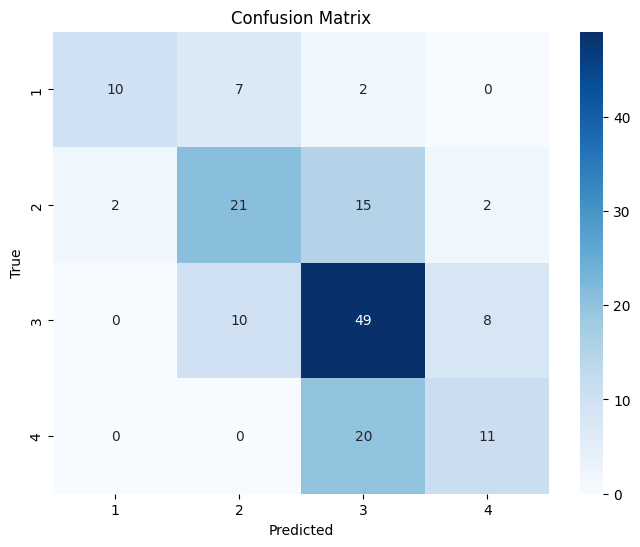

accuracy on train set:  0.6978723404255319
mse on train set:  0.3148936170212766
balanced accuracy on train set:  0.6846856269894499
logistic loss on train set:  0.016211036276699675
          Feature                                       Bin    Points
0       BRA Value  [0.1023505717256087, 0.5855899119784602[  1.945730
1       BRA Value   [6.001724858006494, 24.075530326533293[  0.034001
2       LBC Value   [0.002679215080719, 0.3448229773793171[  0.961334
3       LBC Value   [0.3448229773793171, 2.260081127476215[  0.592427
4       LBC Value   [2.260081127476215, 4.5051300008853685[ -0.512419
..            ...                                       ...       ...
57    cEMDb Value                  [4.141584396362305, inf[  1.283984
58  cEMDLab Value  [0.0179946111758714, 0.2157778314004893[ -0.165245
59  cEMDLab Value  [0.2157778314004893, 0.3769061771257047[ -0.217845
60  cEMDLab Value  [0.3769061771257047, 1.0932778279081192[  0.137798
61  cEMDLab Value                 [1.0932778279

In [14]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_mariajoaocardoso_caim_1ook_ml_model, aesthetic_mariajoaocardoso_caim_1ook_ml_weights = scorecard.fit(aesthetic_evaluation_data_mariajoaocardoso_X, aesthetic_evaluation_data_mariajoaocardoso_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='ML',
                 params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_mariajoaocardoso_caim_1ook_mm_model, aesthetic_mariajoaocardoso_caim_1ook_mm_weights = scorecard.fit(aesthetic_evaluation_data_mariajoaocardoso_X, aesthetic_evaluation_data_mariajoaocardoso_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='MM',
                 params = {'C': 8, 'class_weight': None},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_mariajoaocardoso_caim_1ook_beyondl1_model, aesthetic_mariajoaocardoso_caim_1ook_beyondl1_weights = scorecard.fit(aesthetic_evaluation_data_mariajoaocardoso_X, aesthetic_evaluation_data_mariajoaocardoso_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='BEYOND_L1',
                 params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_mariajoaocardoso_caim_1ook_adaptivelasso_model, aesthetic_mariajoaocardoso_caim_1ook_adaptivelasso_weights = scorecard.fit(aesthetic_evaluation_data_mariajoaocardoso_X, aesthetic_evaluation_data_mariajoaocardoso_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='ADAPTIVE_LASSO',
                 params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()


## wine quality dataset
model wine quality, score between 0 and 10, based on physicochemical tests

https://archive.ics.uci.edu/dataset/186/wine+quality

#### load dataset

Number of observations: 6497
Number of features: 11
Number of target classes: 7
quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64


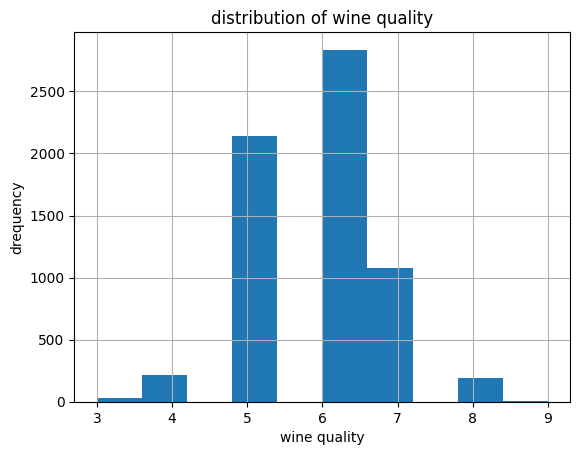

In [2]:
# fetch dataset 
wine_quality_data = fetch_ucirepo(id=186) 

# data (as pandas dataframes) 
wine_quality_X = wine_quality_data.data.features 
wine_quality_y = wine_quality_data.data.targets 
  
# metadata 
#print(wine_quality_data.metadata) 
  
# variable information 
#print(wine_quality_data.variables) 

wine_quality_y = pd.Series(wine_quality_y['quality'], name='quality')
wine_quality_y.value_counts()
wine_quality_y.hist()
plt.xlabel('wine quality')
plt.ylabel('drequency')
plt.title('distribution of wine quality')


# num of observations
num_observations = len(wine_quality_X)
print(f'Number of observations: {num_observations}')

# num of features
num_features = len(wine_quality_X.columns)
print(f'Number of features: {num_features}')

# number of target classes
num_classes = len(wine_quality_y.unique())
print(f'Number of target classes: {num_classes}')

# distribution of target variable
print(wine_quality_y.value_counts())

In [3]:
# change target class to 3 classes: bad, medium and good
wine_quality_y = wine_quality_y.map({3: 'Bad', 4: 'Bad', 5: 'Medium', 6: 'Medium', 7: 'Good', 8: 'Good', 9: 'Good'})
print(wine_quality_y.value_counts())
print("unique values in target variable:", wine_quality_y.unique())

quality
Medium    4974
Good      1277
Bad        246
Name: count, dtype: int64
unique values in target variable: ['Medium' 'Good' 'Bad']


In [4]:
categorical_columns = wine_quality_X.select_dtypes(include=['object']).columns.tolist()
print(f'Categorical columns: {categorical_columns}')

# encode categorical columns
for col in categorical_columns:
    wine_quality_X[col] = wine_quality_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {wine_quality_X[col].unique()}")
    
mapping = {1: 'Bad', 2: 'Medium', 3: 'Good'}

K = 3  # number of classes

Categorical columns: []


#### CAIM & 1ook

testing parameters: {'C': 1000.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.77380424366872
testing parameters: {'C': 1000.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7746258095087664
testing parameters: {'C': 100.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7740095824777549
testing parameters: {'C': 100.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7746258095087664
testing parameters: {'C': 10.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7738044542726267
testing parameters: {'C': 10.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7742153424946032
testing parameters: {'C': 2.5, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.774420049491918
testing paramet

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


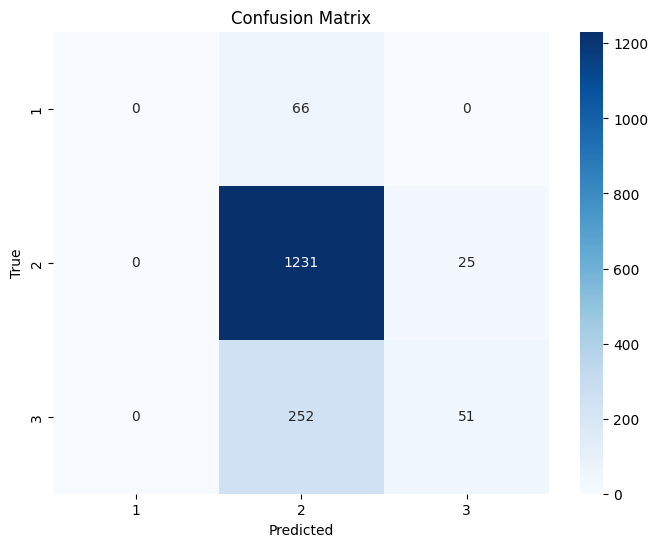

accuracy on train set:  0.7779146141215106
mse on train set:  0.22270114942528735
balanced accuracy on train set:  0.3791904930745556
logistic loss on train set:  0.01859345076233738
                 Feature                 Bin    Points
0          fixed_acidity          [3.8, 5.6[  0.166473
1          fixed_acidity         [7.4, 15.6[ -0.063079
2       volatile_acidity       [0.08, 0.115[  1.697583
3       volatile_acidity       [0.115, 0.19[  0.559110
4       volatile_acidity         [1.58, inf[ -1.004476
5            citric_acid         [0.26, 0.4[  0.845658
6            citric_acid         [0.4, 1.23[  0.572782
7         residual_sugar          [3.0, 7.1[  0.249577
8         residual_sugar         [7.1, 65.8[  0.418360
9              chlorides      [0.014, 0.039[  0.307971
10   free_sulfur_dioxide        [27.0, 49.0[  0.756728
11   free_sulfur_dioxide       [49.0, 146.5[  0.622731
12   free_sulfur_dioxide        [146.5, inf[ -0.612233
13  total_sulfur_dioxide         [6.0, 74.0[  0

In [5]:
start_time = time.time()

scorecard = Scorecard()
wine_caim_1ook_ml_model, wine_caim_1ook_ml_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='ML',
                 params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
wine_caim_1ook_mm_model, wine_caim_1ook_mm_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='MM',
                 params=None,
                 use_sbc=True,
                    K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
wine_caim_1ook_beyondl1_model, wine_caim_1ook_ml_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='BEYOND_L1',
                 params=None,
                 use_sbc=True,
                    K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()   
wine_caim_1ook_adaptivelasso_model, wine_caim_1ook_adaptivelasso_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='ADAPTIVE_LASSO',
                 params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### CAIM & Diff Coding

In [ ]:
start_time = time.time()

scorecard = Scorecard()
wine_caim_diffcod_ml_model, wine_caim_diffcod_ml_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
wine_caim_diffcod_mm_model, wine_caim_diffcod_mm_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
wine_caim_diffcod_beyondl1_model, wine_caim_diffcod_beyondl1_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
wine_caim_diffcod_adaptivelasso_model, wine_caim_diffcod_adaptivelasso_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### Inf Bins & 1ook

In [ ]:
start_time = time.time()

scorecard = Scorecard()
wine_infbins_1ook_ml_model, wine_infbins_1ook_ml_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                    thresholds_method='INF_BINS', 
                    encoding_method='1_OUT_OF_K',
                    model_method='ML',
                    use_sbc=True,
                    mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
wine_infbins_1ook_mm_model, wine_infbins_1ook_mm_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                    thresholds_method='INF_BINS',
                    encoding_method='1_OUT_OF_K',
                    model_method='MM',
                    use_sbc=True,
                    mapping=mapping)
scorecard.evaluate()   

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
wine_infbins_1ook_beyondl1_model, wine_infbins_1ook_beyondl1_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                    thresholds_method='INF_BINS',
                    encoding_method='1_OUT_OF_K',
                    model_method='BEYOND_L1',
                    use_sbc=True,
                    mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
wine_infbins_1ook_adaptivelasso_model, wine_infbins_1ook_adaptivelasso_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                    thresholds_method='INF_BINS',
                    encoding_method='1_OUT_OF_K',
                    model_method='ADAPTIVE_LASSO',
                    use_sbc=True,
                    mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

#### Inf Bins & Diff Coding

In [ ]:
start_time = time.time()

scorecard = Scorecard()

wine_infbins_diffcod_ml_model, wine_infbins_diffcod_ml_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING',
                model_method='ML',
                use_sbc=True,
                mapping=mapping,
                num_nonzero_weights=None,
                show_prints=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()
scorecard = Scorecard()
wine_infbins_diffcod_mm_model, wine_infbins_diffcod_mm_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                use_sbc=True,
                mapping=mapping,
                num_nonzero_weights=None,
                show_prints=True)
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()
scorecard = Scorecard()
wine_infbins_diffcod_beyondl1_model, wine_infbins_diffcod_beyondl1_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                use_sbc=True)
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()
scorecard = Scorecard()
wine_infbins_diffcod_adaptivelasso_model, wine_infbins_diffcod_adaptivelasso_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                use_sbc=True,
                mapping=None,
                num_nonzero_weights=None,
                show_prints=True,
                params={'alpha': 1.2915496650148827 * 10**-7})
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## car evaluation dataset
evaluate car acceptability

https://archive.ics.uci.edu/dataset/19/car+evaluation

#### load dataset

In [ ]:
# fetch dataset 
car_evaluation_data = fetch_ucirepo(id=19) 
  
# data (as pandas dataframes) 
car_evaluation_X = car_evaluation_data.data.features 
car_evaluation_y = car_evaluation_data.data.targets 
  
# metadata 
print(car_evaluation_data.metadata) 
  
# variable information 
print(car_evaluation_data.variables) 

In [ ]:
car_evaluation_y = pd.Series(car_evaluation_y['class'], name='class')

In [ ]:
car_evaluation_y.value_counts()

In [ ]:
car_evaluation_y.hist()
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Class')

In [ ]:
# get type of each column
print("types: ", car_evaluation_X.dtypes)

# show categorical columns
print("\nobject columns: ", car_evaluation_X.select_dtypes(include=['object']).columns)
categorical_columns = car_evaluation_X.select_dtypes(include=['object']).columns

# show number of unique values in each categorical column
print("\nnumber of unique values in each categorical column: ", car_evaluation_X.select_dtypes(include=['object']).nunique())

# show values of all categorical columns
print("\nvalues of all categorical columns: ", car_evaluation_X.select_dtypes(include=['object']).apply(lambda x: x.unique()))

In [ ]:
categorical_columns = car_evaluation_X.select_dtypes(include=['object']).columns.tolist()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    car_evaluation_X.loc[:, col] = car_evaluation_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {car_evaluation_X[col].unique()}")

In [ ]:
mapping = {1: 'unacc', 2: 'acc', 3: 'good', 4: 'vgood'}

#### CAIM & 1ook

In [ ]:
start_time = time.time()

scorecard = Scorecard()
car_caim_1ook_ml_model, car_caim_1ook_ml_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='ML',
                 use_sbc=True,
                 mapping=mapping)

scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
car_caim_1ook_mm_model, car_caim_1ook_mm_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='MM',
                 use_sbc=True,
                 mapping=mapping)

scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
car_caim_1ook_beyondl1_model, car_caim_1ook_beyondl1_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='BEYOND_L1',
                 use_sbc=True,
                 mapping=mapping)

scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
car_caim_1ook_adaptivelasso_model, car_caim_1ook_adaptivelasso_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='ADAPTIVE_LASSO',
                 use_sbc=True,
                 mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

#### CAIM & Diff Coding

In [ ]:
start_time = time.time()
scorecard = Scorecard()
car_caim_diffcod_ml_model, car_caim_diffcod_ml_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=True)
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()
scorecard = Scorecard()
car_caim_diffcod_mm_model, car_caim_diffcod_mm_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                use_sbc=True)
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()
scorecard = Scorecard()
car_caim_diffcod_beyondl1_model, car_caim_diffcod_beyondl1_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                use_sbc=True)
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()
scorecard = Scorecard()
car_caim_1ook_ml_model, car_caim_1ook_ml_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                use_sbc=True)
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

#### Inf Bins & 1ook

In [ ]:
start_time = time.time()

scorecard = Scorecard()
car_infbins_1ook_ml_model, car_caim_1ook_ml_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='ML',
                 use_sbc=True,
                 mapping=mapping)

scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
car_infbins_1ook_mm_model, car_infbins_1ook_mm_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='MM',
                 use_sbc=True,
                 mapping=mapping)

scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
car_infbins_1ook_beyondl1_model, car_infbins_1ook_beyondl1_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='BEYOND_L1',
                 use_sbc=True,
                 mapping=mapping)

scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
car_infbins_1ook_adaptivelasso_model, car_infbins_1ook_adaptivelasso_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='ADAPTIVE_LASSO',
                 use_sbc=True,
                 mapping=mapping)

scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

#### Inf Bins & Diff Coding

In [ ]:
start_time = time.time()
scorecard = Scorecard()
car_caim_1ook_ml_model, car_caim_1ook_ml_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=True)
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()
scorecard = Scorecard()
car_caim_1ook_ml_model, car_caim_1ook_ml_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                use_sbc=True)
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()
scorecard = Scorecard()
car_caim_1ook_ml_model, car_caim_1ook_ml_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                use_sbc=True)
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()
scorecard = Scorecard()
car_caim_1ook_ml_model, car_caim_1ook_ml_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                use_sbc=True)
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## abalone

#### load dataset

In [ ]:
# fetch dataset 
abalone_data = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
abalone_X = abalone_data.data.features 
abalone_y = abalone_data.data.targets 
  
# metadata 
# print(abalone_data.metadata) 
  
# variable information 
# print(abalone_data.variables) 

abalone_y  = pd.Series(abalone_y ['Rings'], name='Rings')
print(abalone_y .value_counts())
abalone_y.hist()
plt.xlabel('Rings')
plt.ylabel('Frequency')
plt.title('Distribution of Rings')

In [ ]:
abalone_y = abalone_y.map(lambda x: 1 if x <= 5 else
                          (2 if x <= 10 else
                           (3 if x <= 15 else
                            (4 if x <= 20 else 5))))

print(abalone_y.value_counts())

In [ ]:
categorical_columns = abalone_X.select_dtypes(include=['object']).columns.tolist()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    abalone_X.loc[:, col] = abalone_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {abalone_X[col].unique()}")

#### CAIM & 1ook

In [ ]:
start_time = time.time()

scorecard = Scorecard()
abalone_caim_1ook_ml_model, abalone_caim_1ook_ml_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='ML',
                 use_sbc=True)

scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
abalone_caim_1ook_mm_model, abalone_caim_1ook_mm_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='MM',
                 use_sbc=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
abalone_caim_1ook_beyondl1_model, abalone_caim_1ook_beyondl1_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='BEYOND_L1',
                 use_sbc=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
abalone_caim_1ook_adaptivelasso_model, abalone_caim_1ook_adaptivelasso_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='ADAPTIVE_LASSO',
                 use_sbc=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

#### CAIM & Diff Coding

In [ ]:
start_time = time.time()

scorecard = Scorecard()
abalone_caim_diffcod_ml_model, abalone_caim_diffcod_ml_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
abalone_caim_diffcod_mm_model, abalone_caim_diffcod_mm_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='DIFF_CODING',
                 model_method='MM',
                 use_sbc=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
abalone_caim_diffcod_beyondl1_model, abalone_caim_diffcod_beyondl1_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='DIFF_CODING',
                 model_method='BEYOND_L1',
                 use_sbc=True)

scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
abalone_caim_diffcod_adaptivelasso_model, abalone_caim_diffcod_adaptivelasso_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='DIFF_CODING',
                 model_method='ADAPTIVE_LASSO',
                 use_sbc=True)

scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

#### Inf Bins & 1ook

In [ ]:
start_time = time.time()

scorecard = Scorecard()
abalone_infbins_1ook_ml_model, abalone_infbins_1ook_ml_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='ML',
                 use_sbc=True)

scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
abalone_infbins_1ook_mm_model, abalone_infbins_1ook_mm_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='MM',
                 use_sbc=True)

scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
abalone_infbins_1ook_beyondl1_model, abalone_infbins_1ook_beyondl1_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='BEYOND_L1',
                 use_sbc=True)

scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
abalone_infbins_1ook_adaptivelasso_model, abalone_infbins_1ook_adaptivelasso_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='ADAPTIVE_LASSO',
                 use_sbc=True)

scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

#### Inf Bins & Diff Coding

In [ ]:
start_time = time.time()

scorecard = Scorecard()
abalone_infbins_diffcod_ml_model, abalone_infbins_diffcod_ml_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='DIFF_CODING',
                 model_method='ML',
                 use_sbc=True)

scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
abalone_infbins_diffcod_mm_model, abalone_infbins_diffcod_mm_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='DIFF_CODING',
                 model_method='MM',
                 use_sbc=True)

scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
abalone_infbins_diffcod_beyondl1_model, abalone_infbins_diffcod_beyondl1_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='DIFF_CODING',
                 model_method='BEYOND_L1',
                 use_sbc=True)

scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
abalone_infbins_diffcod_adaptivelasso_model, abalone_infbins_diffcod_adaptivelasso_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='DIFF_CODING',
                 model_method='ADAPTIVE_LASSO',
                 use_sbc=True)

scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## balance scale
classify each example as having the balance scale tip to the right, tip to the left, or be balanced (from 1 to 5)

https://archive.ics.uci.edu/dataset/12/balance+scale

#### load dataset

In [ ]:
# fetch dataset 
balance_scale_data = fetch_ucirepo(id=12) 
  
# data (as pandas dataframes) 
balance_scale_X = balance_scale_data.data.features 
balance_scale_y = balance_scale_data.data.targets 
  
# metadata 
print(balance_scale_data.metadata) 
  
# variable information 
print(balance_scale_data.variables) 

balance_scale_y  = pd.Series(balance_scale_y['class'], name='class')
print(balance_scale_y.value_counts())
balance_scale_y.hist()
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Class')

In [ ]:
categorical_columns = balance_scale_X.select_dtypes(include=['object']).columns.tolist()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    balance_scale_X.loc[:, col] = balance_scale_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {balance_scale_X[col].unique()}")
    
mapping = {1: 'L', 2: 'B', 3: 'R'}

#### CAIM & 1ook

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_caim_1ook_ml_model, balance_caim_1ook_ml_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='ML',
                 use_sbc=True,
                 mapping=mapping)

scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_caim_1ook_mm_model, balance_caim_1ook_mm_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='MM',
                 use_sbc=True,
                 mapping=mapping)

scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_caim_1ook_beyondl1_model, balance_caim_1ook_beyondl1_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='BEYOND_L1',
                 use_sbc=True,
                 mapping=mapping)

scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_caim_1ook_adaptivelasso_model, balance_caim_1ook_adaptivelasso_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='ADAPTIVE_LASSO',
                 use_sbc=True,
                 mapping=mapping)

scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

#### CAIM & Diff Coding

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_caim_diffcod_ml_model, balance_caim_diffcod_ml_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=True,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_caim_diffcod_mm_model, balance_caim_diffcod_mm_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                use_sbc=True,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_caim_diffcod_beyondl1_model, balance_caim_diffcod_beyondl1_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                use_sbc=True,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_caim_diffcod_adaptivelasso_model, balance_caim_diffcod_adaptivelasso_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                use_sbc=True,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

#### Inf Bins & 1ook

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_infbins_1ook_ml_model, balance_infbins_1ook_ml_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                    thresholds_method='INF_BINS',
                    encoding_method='1_OUT_OF_K',
                    model_method='ML',
                    use_sbc=True,
                    mapping=mapping)

scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_infbins_1ook_mm_model, balance_infbins_1ook_mm_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                    thresholds_method='INF_BINS',
                    encoding_method='1_OUT_OF_K',
                    model_method='MM',
                    use_sbc=True,
                    mapping=mapping)

scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_infbins_1ook_beyondl1_model, balance_infbins_1ook_beyondl1_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                    thresholds_method='INF_BINS',
                    encoding_method='1_OUT_OF_K',
                    model_method='BEYOND_L1',
                    use_sbc=True,
                    mapping=mapping)

scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_infbins_1ook_adaptivelasso_model, balance_infbins_1ook_adaptivelasso_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                    thresholds_method='INF_BINS',
                    encoding_method='1_OUT_OF_K',
                    model_method='ADAPTIVE_LASSO',
                    use_sbc=True,
                    mapping=mapping)

scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

#### Inf Bins & Diff Coding

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_infbins_diffcod_ml_model, balance_infbins_diffcod_ml_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=True,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_infbins_diffcod_mm_model, balance_infbins_diffcod_mm_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                use_sbc=True,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_infbins_diffcod_beyondl1_model, balance_infbins_diffcod_beyondl1_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                use_sbc=True,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_infbins_diffcod_adaptivelasso_model, balance_infbins_diffcod_adaptivelasso_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                use_sbc=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## lenses

classes:
- 1 : the patient should be fitted with hard contact lenses,
- 2 : the patient should be fitted with soft contact lenses,
- 3 : the patient should not be fitted with contact lenses.


https://archive.ics.uci.edu/dataset/58/lenses

#### load dataset

In [ ]:
# fetch dataset 
lenses_data = fetch_ucirepo(id=58) 
  
# data (as pandas dataframes) 
lenses_X = lenses_data.data.features 
lenses_y = lenses_data.data.targets
  
# metadata 
print(lenses_data.metadata) 
  
# variable information 
print(lenses_data.variables) 

lenses_y  = pd.Series(lenses_y['class'], name='class')
print(lenses_y.value_counts())
lenses_y.hist()
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Class')

In [ ]:
categorical_columns = lenses_X.select_dtypes(include=['object']).columns.tolist()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    lenses_X.loc[:, col] = lenses_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {lenses_X[col].unique()}")

#### CAIM & 1ook

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_caim_1ook_ml_model, lenses_caim_1ook_ml_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_caim_1ook_mm_model, lenses_caim_1ook_mm_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='MM',
                use_sbc=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_caim_1ook_beyondl1_model, lenses_caim_1ook_beyondl1_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='BEYOND_L1',
                use_sbc=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_caim_1ook_adaptivelasso_model, lenses_caim_1ook_adaptivelasso_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ADAPTIVE_LASSO',
                use_sbc=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

#### CAIM & Diff Coding

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_caim_diffcod_ml_model, lenses_caim_diffcod_ml_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_caim_diffcod_mm_model, lenses_caim_diffcod_mm_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING',
                model_method='MM',
                use_sbc=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_caim_diffcod_beyondl1_model, lenses_caim_diffcod_beyondl1_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                use_sbc=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_caim_diffcod_adaptivelasso_model, lenses_caim_diffcod_adaptivelasso_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                use_sbc=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

#### Inf Bins & 1ook

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_infbins_1ook_ml_model, lenses_infbins_1ook_ml_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_infbins_1ook_mm_model, lenses_infbins_1ook_mm_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='MM',
                use_sbc=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_infbins_1ook_beyondl1_model, lenses_infbins_1ook_beyondl1_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='BEYOND_L1',
                use_sbc=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_infbins_1ook_adaptivelasso_model, lenses_infbins_1ook_adaptivelasso_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ADAPTIVE_LASSO',
                use_sbc=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

#### Inf Bins & Diff Coding

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_infbins_diffcod_ml_model, lenses_infbins_diffcod_ml_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_infbins_diffcod_mm_model, lenses_infbins_diffcod_mm_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                use_sbc=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_infbins_diffcod_beyondl1_model, lenses_infbins_diffcod_beyondl1_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                use_sbc=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_infbins_diffcod_adaptivelasso_model, lenses_infbins_diffcod_adaptivelasso_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                use_sbc=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## student performance
predict student performance in secondary education (high school)

https://archive.ics.uci.edu/dataset/320/student+performance

#### load dataset

In [ ]:
# fetch dataset 
student_performance_data = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
student_performance_X = student_performance_data.data.features 
student_performance_y = student_performance_data.data.targets 
# delete targets 'G1' and 'G2'
student_performance_y = student_performance_y.drop(columns=['G1', 'G2'])

# make classes
student_performance_y = student_performance_y['G3'].apply(
    lambda x: 'low' if x < 10 else ('medium' if x < 14 else ('good' if x < 18 else 'very good'))
)

# metadata 
# print(student_performance_data.metadata) 
  
# variable information 
# print(student_performance_data.variables) 

student_performance_y = pd.Series(student_performance_y)
print(student_performance_y.value_counts())
student_performance_y.hist()
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Class')


# num of observations
num_observations = len(student_performance_X)
print(f'Number of observations: {num_observations}')

# num of features
num_features = len(student_performance_X.columns)
print(f'Number of features: {num_features}')

# number of target classes
num_classes = len(student_performance_y.unique())
print(f'Number of target classes: {num_classes}')

In [ ]:
categorical_columns = student_performance_X.select_dtypes(include=['object']).columns.tolist()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    student_performance_X.loc[:, col] = student_performance_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {student_performance_X[col].unique()}")

mapping = {'low': 1, 'medium': 2, 'good': 3, 'very good': 4}

#### CAIM & 1ook

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_caim_1ook_ml_model, student_caim_1ook_ml_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_caim_1ook_mm_model, student_caim_1ook_mm_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='MM',
                use_sbc=True,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_caim_1ook_beyondl1_model, student_caim_1ook_beyondl1_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='BEYOND_L1',
                use_sbc=True,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_caim_1ook_adaptivelasso_model, student_caim_1ook_adaptivelasso_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ADAPTIVE_LASSO',
                use_sbc=True,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

#### CAIM & Diff Coding

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_caim_diffcod_ml_model, student_caim_diffcod_ml_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=True,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_caim_diffcod_mm_model, student_caim_diffcod_mm_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                use_sbc=True,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_caim_diffcod_beyondl1_model, student_caim_diffcod_beyondl1_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                use_sbc=True,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_caim_diffcod_adaptivelasso_model, student_caim_diffcod_adaptivelasso_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                use_sbc=True,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

#### Inf Bins & 1ook

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_infbins_1ook_ml_model, student_infbins_1ook_ml_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_infbins_1ook_mm_model, student_infbins_1ook_mm_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='MM',
                use_sbc=True,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_infbins_1ook_beyondl1_model, student_infbins_1ook_beyondl1_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='BEYOND_L1',
                use_sbc=True,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_infbins_1ook_adaptivelasso_model, student_infbins_1ook_adaptivelasso_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ADAPTIVE_LASSO',
                use_sbc=True,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

#### Inf Bins & Diff Coding

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_infbins_diffcod_ml_model, student_infbins_diffcod_ml_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=True,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_infbins_diffcod_mm_model, student_infbins_diffcod_mm_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                use_sbc=True,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_infbins_diffcod_beyondl1_model, student_infbins_diffcod_beyondl1_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                use_sbc=True,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_infbins_diffcod_adaptivelasso_model, student_infbins_diffcod_adaptivelasso_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                use_sbc=True,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")